In [1]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.dpi'] = 100 # Para mejorar la resolución gráfica
plt.rcParams['savefig.dpi'] = 100 # Para mejorar la resolución gráfica

In [2]:
datos = pd.read_csv("newdata.csv")
data = datos[['Cost Delivery', 'Number of Comments', 'Expected Delivery Time', 'Time(min)']]

In [3]:
datas = data.dropna()

In [4]:
datas.isnull().sum()

Cost Delivery             0
Number of Comments        0
Expected Delivery Time    0
Time(min)                 0
dtype: int64

In [5]:
datas["LNC"] = np.where(datas["Number of Comments"] <= 1, 0, np.log(datas["Number of Comments"]))

/home/jc/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
datas.describe()

,Cost Delivery,Number of Comments,Expected Delivery Time,Time(min),LNC
count,14183.000000,14183.000000,14183.000000,14183.000000,14183.000000
mean,2587.525347,200.012480,44.491927,20.758866,3.100675
std,1407.166800,807.825694,13.989068,13.348167,2.236451
min,0.000000,0.000000,5.000000,1.000000,0.000000
25%,2000.000000,3.000000,40.000000,11.000000,1.098612
50%,2800.000000,24.000000,45.000000,19.000000,3.178054
75%,3200.000000,125.000000,50.000000,28.000000,4.828314
max,15000.000000,12832.000000,90.000000,59.000000,9.459697


In [7]:
def corrfunc(x, y, ax=None, **kws):
    """Indique el coeficiente de correlación en la parte superior izquierda del gráfique"""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes) 

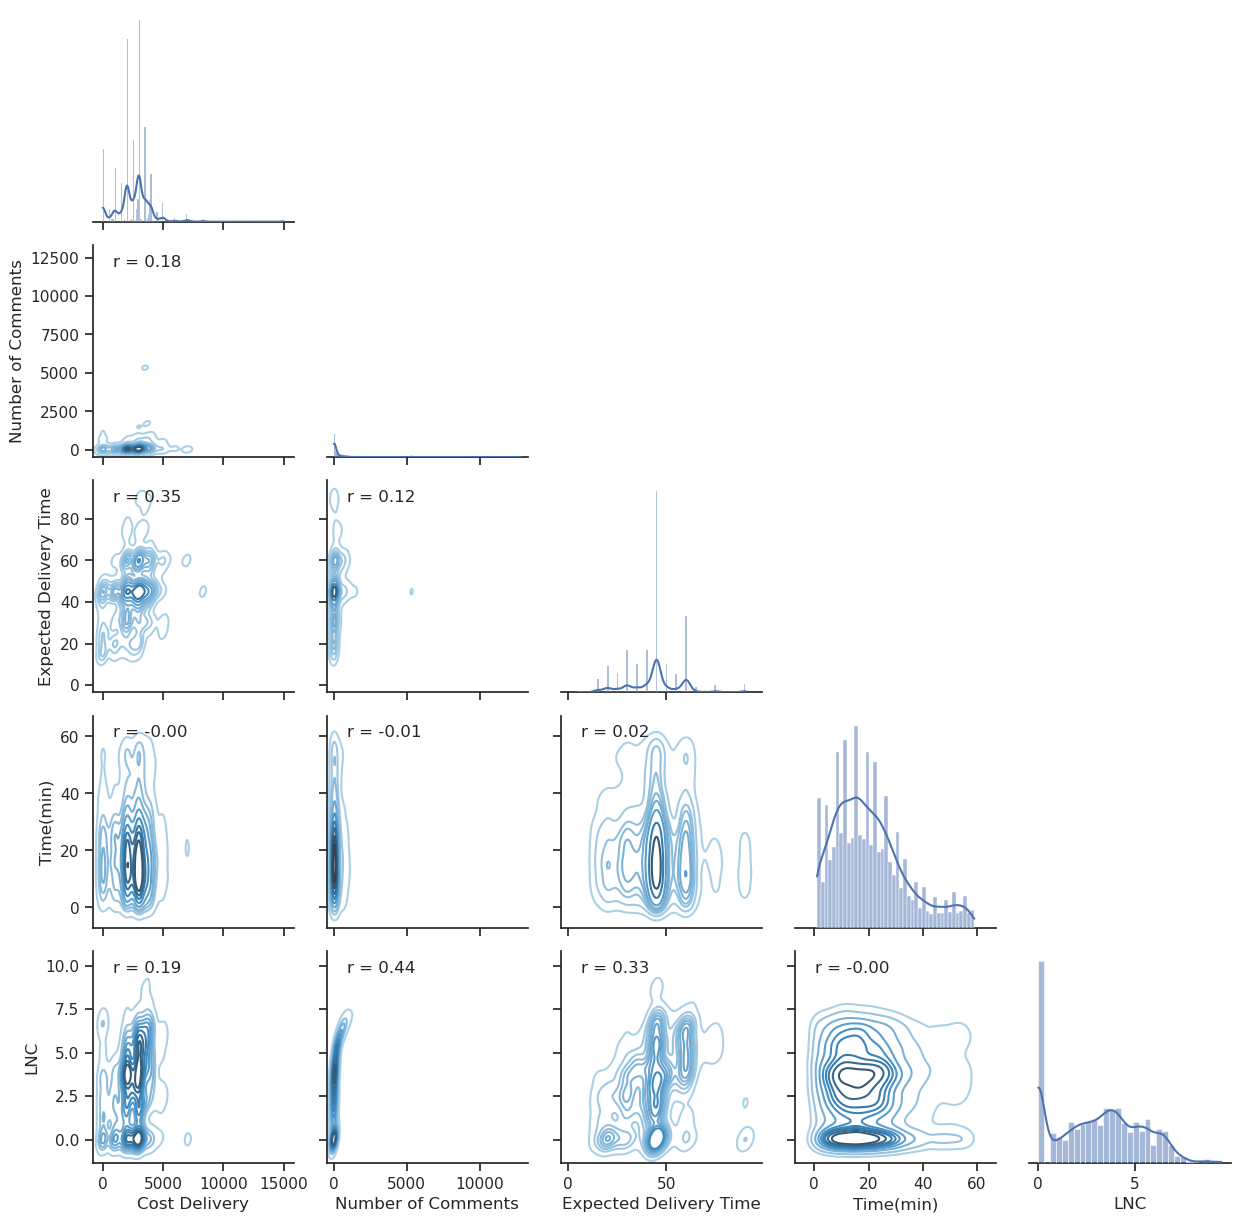

In [8]:
g = sns.PairGrid(datas, diag_sharey=False, corner=True)
g.map_diag(sns.histplot, kde=True)
g.map_lower(corrfunc)
g.map_lower(sns.kdeplot, cmap="Blues_d")